<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/2024-05-31-oleskii-manual-least-squared-errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from operator import itemgetter
import pandas as pd
x = requests.get('https://api.stormgate.untapped.gg/api/v1/leaderboard?match_mode=ranked_1v1')




In [ ]:
data = x.json()


In [ ]:
df = pd.DataFrame(data)
df.index = df.index + 1
df


def assign_value(faction):
    first_letter = faction[0].lower()
    if first_letter == 'v':
        return 0
    elif first_letter == 'i':
        return 1
    else:
        return 2


def assign_value(league):
    first_letter = league[0].lower()
    if first_letter == 'm':
        return 3
    elif first_letter == 'd':
        return 2
    elif first_letter == 'p':
        return 1
    else:
      return 0


df['race'] = df['race'].apply(lambda x: assign_value(x))
df['league'] = df['league'].apply(lambda x: assign_value(x))
df

,league,losses,mmr,points,race,tier,ties,wins,playerName,profileId
1,3,8,2383.9534,2375.9137,0,1,0,253,PartinG,7tsx54K
2,3,56,2323.4366,2335.8066,0,1,0,323,Denver,7Z62sdL
3,3,40,2251.9032,2280.2955,0,1,0,195,Adonminus,M5hyQss
4,3,34,2250.7985,2244.0058,0,1,0,221,albino,6mnBN2Y
5,3,100,2161.0989,2210.5528,0,1,0,292,이론,B6PUpXL
...,...,...,...,...,...,...,...,...,...,...
496,0,34,1550.0640,1466.5129,0,3,0,44,kire1master,8Ka84kZ
497,0,207,1298.7816,1465.7829,0,3,0,170,ax,Bya6zEg
498,0,73,1507.9159,1463.6358,0,3,0,86,hiStOrYs_ArT,CpN59pX
499,0,35,1538.5243,1462.7842,0,3,0,42,Djbo3,5XexirF


<ipython-input-42-7daf101e5e36>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio['winrate'] = df['wins'] / (df['wins'] + df['losses'])
<ipython-input-42-7daf101e5e36>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio['matches'] = (df['wins'] + df['losses'])


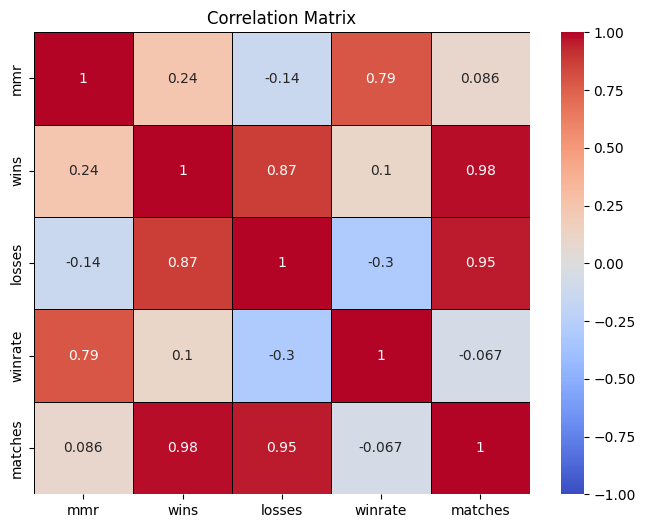

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import seaborn as sns


#

ratio = df[['mmr', 'wins', 'losses']]
#mmr means match making rating
ratio['winrate'] = df['wins'] / (df['wins'] + df['losses'])
ratio['matches'] = (df['wins'] + df['losses'])
corr_matrix = ratio.corr()
ratio

plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()
#import seaborn as sns
#corr_matrix = wine.corr()
#plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
#            linewidths=0.5, linecolor='black')
#plt.title('Correlation Matrix')
#plt.show()


In [ ]:
b = 1500
x1 = df['losses']
m1 = 0
x2 = df['wins']
m2 = 0
x3 = (ratio['winrate']-0.5)
m3 = 1500

y = b + x1*m1 + x2*m2 + x3*m3
yreal = df[['mmr']]
yreal = yreal.squeeze()
print(y)
print(yreal)

def least_squared_error(array1, array2):
    if len(array1) != len(array2):
        raise ValueError("Arrays must be of the same length")
    differences = np.subtract(array1, array2)
    squared_differences = np.square(differences)
    lse = np.sum(squared_differences)
    return lse

squarederrorLeast = 9999999999999 #There is definitely way better ways of making an upper limit, but for the sake of simplicity I did it like this for now.

for i in range(0, 10000): #Finding whether winrate has any affect on your mmr
    y = b + x1*m1 + x2*m2 + x3*i
    squarederrorActual = least_squared_error(y, yreal)
    if (squarederrorActual<squarederrorLeast):
      squarederrorLeast = squarederrorActual
      m3 = i

print(squarederrorLeast)
for i in np.arange(-5, 5, 0.01): #Finding whether wins count has any affect on your mmr
    y = b + x1*m1 + x2*i + x3*m3
    squarederrorActual = least_squared_error(y, yreal)
    if (squarederrorActual<squarederrorLeast):
      squarederrorLeast = squarederrorActual
      m2 = i

print(squarederrorLeast)
for i in np.arange(-5, 5, 0.1): #Finding whether loses count has any affect on your mmr
    y = b + x1*i + x2*m2 + x3*m3
    squarederrorActual = least_squared_error(y, yreal)
    if (squarederrorActual<squarederrorLeast):
      squarederrorLeast = squarederrorActual
      m1 = i

print(squarederrorActual)
print(squarederrorLeast)
print(m3, m2, m1)

1      2204.022989
2      2028.364116
3      1994.680851
4      2050.000000
5      1867.346939
          ...     
496    1596.153846
497    1426.392573
498    1561.320755
499    1568.181818
500    1592.857143
Length: 500, dtype: float64
1      2383.9534
2      2323.4366
3      2251.9032
4      2250.7985
5      2161.0989
         ...    
496    1550.0640
497    1298.7816
498    1507.9159
499    1538.5243
500    1535.5720
Name: mmr, Length: 500, dtype: float64
6735325.1983746225
5965376.087069867
58947267.134068266
5951166.8496616855
2336 0.4099999999998847 0.09999999999998188


In [ ]:
x1.values
x1.to_numpy()

array([  8,  56,  40,  34, 100,  34, 195,   5,  50,   2,  76,  58,  62,
        91,  28,  10,  96,  57,  41,  66,  32,  82,  72,   7,  75,  41,
        38, 148, 118,  57,  56,  59, 132, 112,  48,  55, 114,  50,  18,
        72,  21, 130, 110,  55,  15, 171,  87, 207, 233, 172,  95, 102,
        12,  25,  33,  49,  72, 203,  47,  42,  12,  49,  68, 165,  69,
        15,  42, 189, 120,  77, 115,  81,  71, 112,  55,  22,  98, 274,
        28,  61,  66,  33, 193,   3,  13,  76,  43,  39,  73,  57, 118,
       106,  84,  35,  29,  19,  50, 109,  64,  25,  31,  93,  54,  64,
        72,  42, 140,  56,  51, 155, 110,  34, 118,  63,  38,  32,  93,
       155,  10, 138, 241,  35,  34,  70,  15, 111,  43,  31,  36,  33,
        99, 104,  80,  57,  52,  68, 250,  53,  35,  59,  55,  30,   6,
        36,  20,  55,  48,  54,  35,  43,  34,  49, 106,  33,  36,  41,
        54,  55,  48,  68, 140,  41,  14,  35,  12, 102,  75,  60,  64,
        48,  51,  90,  41,  68,  64, 173,  25,  30, 130,  15,  4